In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
%matplotlib inline

In [2]:
temps = pd.read_csv('./GlobalLandTemperaturesByCountry.csv')
temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
oil = pd.read_excel('MachineLearning\OilConsumption.xlsx')
oil.head()

,Year,Thousand Oil Barrels Daily
0,1965,11522.187698
1,1966,12100.347314
2,1967,12566.880466
3,1968,13404.548552
4,1969,14152.985096


In [4]:
us_temps = temps[temps["Country"] == "United States"]
us_temps = us_temps[us_temps["dt"] >= '1965-01-01']
us_temps

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
557236,1965-01-01,-3.194,0.120,United States
557237,1965-02-01,-3.053,0.152,United States
557238,1965-03-01,0.886,0.254,United States
557239,1965-04-01,8.701,0.157,United States
557240,1965-05-01,13.778,0.344,United States
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [5]:
# us_yearly = us_temps.groupby(us_temps['dt'].dt.year)
# us_yearly
us_temps['dt'] = pd.to_datetime(us_temps['dt'], format="%Y-%m-%d")
us_temps

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
557236,1965-01-01,-3.194,0.120,United States
557237,1965-02-01,-3.053,0.152,United States
557238,1965-03-01,0.886,0.254,United States
557239,1965-04-01,8.701,0.157,United States
557240,1965-05-01,13.778,0.344,United States
...,...,...,...,...
557816,2013-05-01,14.073,0.178,United States
557817,2013-06-01,20.198,0.236,United States
557818,2013-07-01,22.074,0.152,United States
557819,2013-08-01,21.168,0.249,United States


In [6]:
temporary_df = us_temps.groupby(us_temps['dt'].dt.year)
avg_temp = temporary_df["AverageTemperature"].mean()

us_yearly = pd.DataFrame({"Avg Temp" : avg_temp})
us_yearly["Year"] = us_yearly.index
us_yearly.head(10)

,Avg Temp,Year
dt,,
1965,8.647667,1965
1966,8.483000,1966
1967,8.902000,1967
1968,8.553250,1968
1969,8.770833,1969
1970,8.673000,1970
1971,8.442500,1971
1972,8.428083,1972
1973,8.934667,1973


In [7]:
temp_vs_oil = us_yearly.merge(oil, on="Year")
temp_vs_oil.dtypes

Avg Temp                      float64
Year                            int64
Thousand Oil Barrels Daily    float64
dtype: object

In [8]:
# Data must be in int form for model.fit to work, it doesn't like float
temp_vs_oil["Thousand Oil Barrels Daily"] = [int(x) for x in temp_vs_oil["Thousand Oil Barrels Daily"]]

In [9]:
X = temp_vs_oil["Thousand Oil Barrels Daily"].values.reshape(-1, 1)
y = temp_vs_oil["Avg Temp"].values.reshape(-1, 1)

Text(0, 0.5, 'Avg Yearly Temperature')

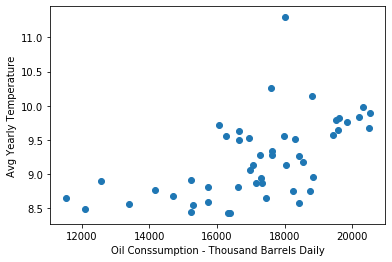

In [10]:
plt.scatter(X, y)
plt.xlabel("Oil Conssumption - Thousand Barrels Daily")
plt.ylabel("Avg Yearly Temperature")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LinearRegression()

In [12]:
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.18538544382208352
R-squared (R2 ): 0.12126692526036664


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.pipeline import make_pipeline

In [15]:
# df = temp_vs_oil

# # Alpha (regularization strength) of LASSO regression
# lasso_eps = 0.0001
# lasso_nalpha=20
# lasso_iter=5000
# # Min and max degree of polynomials features to consider
# degree_min = 2
# degree_max = 8
# # Reshape data
# X = df['Thousand Oil Barrels Daily'].values.reshape(-1, 1)
# y = df['Avg Temp'].values.reshape(-1, 1)


# # Test/train split
# X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)
# # Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
# for degree in range(degree_min,degree_max+1):
#     model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,normalize=True,cv=5))
#     model.fit(X_train,y_train)
#     test_pred = np.array(model.predict(X_test))
#     RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
#     test_score = model.score(X_test,y_test)

#     # print(f"{degree}, {test_score}")
#     predicted = model.predict(X_test)

#     mse = mean_squared_error(y_test, predicted)
#     r2 = r2_score(y_test, predicted)
#     print(degree)
#     print(f"Mean Squared Error (MSE): {mse}")
#     print(f"R-squared (R2 ): {r2}\n--------------------------")

In [16]:
X_data = X_train[:,0]
y_data = y_train[:,0]

In [17]:
X_data

array([17317, 13404, 15222, 20531, 20312, 17983, 17062, 16630, 16059,
       17325, 18826, 17634, 11522, 18840, 18538, 14709, 17634, 17460,
       19534, 12100, 16280, 12566, 19624, 19593, 17283, 20498, 16333,
       16664, 15234, 18005, 15726, 16380, 20208, 18438, 17161, 19847],
      dtype=int64)

In [18]:
from scipy.optimize import curve_fit

def func_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

def exponential_regression (x_data, y_data):
    popt, pcov = curve_fit(func_exp, x_data, y_data, p0 = [np.max(y_data), x_data[np.argmax(y_data)], 0.1])
    print(popt)
    puntos = plt.plot(x_data, y_data, 'x', color='xkcd:maroon', label = "data")
    curva_regresion = plt.plot(x_data, func_exp(x_data, *popt), color='xkcd:teal', label = "fit: {:.3f}, {:.3f}, {:.3f}".format(*popt))
    plt.legend()
    plt.show()
    return func_exp(x_data, *popt)

[1.12971111e+01 1.80050000e+04 9.22739429e+00]


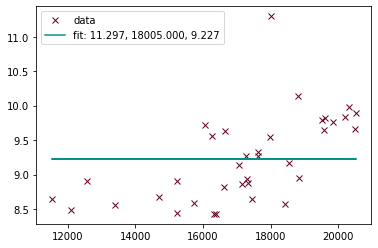

array([9.22739429, 9.22739429, 9.22739429, 9.22739429, 9.22739429,
       9.22739429, 9.22739429, 9.22739429, 9.22739429, 9.22739429,
       9.22739429, 9.22739429, 9.22739429, 9.22739429, 9.22739429,
       9.22739429, 9.22739429, 9.22739429, 9.22739429, 9.22739429,
       9.22739429, 9.22739429, 9.22739429, 9.22739429, 9.22739429,
       9.22739429, 9.22739429, 9.22739429, 9.22739429, 9.22739429,
       9.22739429, 9.22739429, 9.22739429, 9.22739429, 9.22739429,
       9.22739429])

In [20]:
exponential_regression(X_data, y_data)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

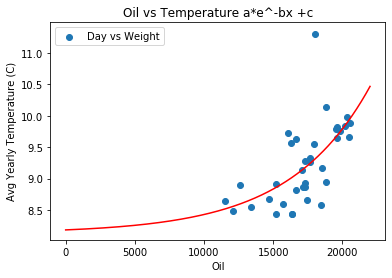

The equation of regression line is y=0.05e^(-0.0002x)+8.13


In [26]:
popt, pcov = curve_fit(func, X_data, y_data, p0=[1, 1e-6, 1])
x_plot=np.linspace(0,22000,10000)
plt.plot(x_plot, func(x_plot, *popt), 'r-')
plt.scatter(X_data,y_data,label='Day vs Weight')
plt.title("Oil vs Temperature a*e^-bx +c")
plt.xlabel('Oil')
plt.ylabel('Avg Yearly Temperature (C)')
plt.legend()
plt.show()
# equation
a=popt[0].round(2)
b=popt[1].round(4)
c=popt[2].round(2)
print(f'The equation of regression line is y={a}e^({b}x)+{c}')